### Statistics Height Example Using Input from User ###

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

n = 500

n = 500


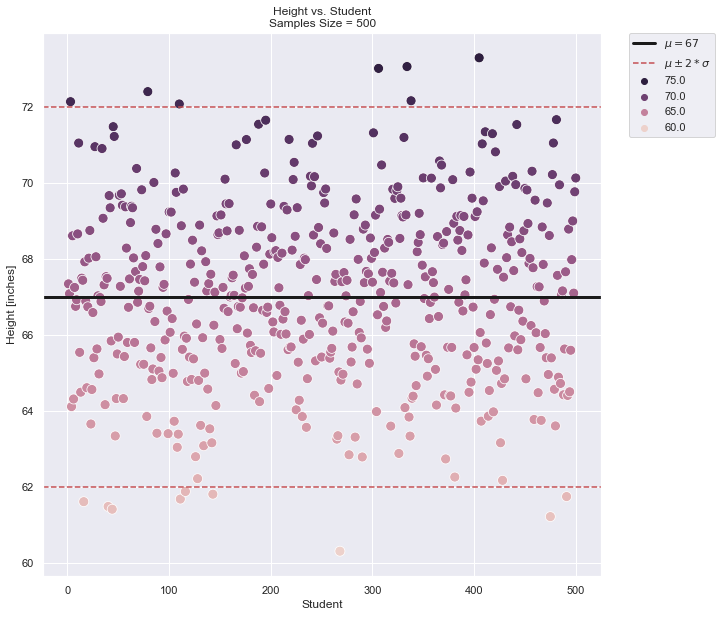

In [2]:
sns.set()

# scales the marker size for the plot. Large markers for small sample size, small markers for large sample size
def marker_scale():
    marker_scaling = {50: 150, 100: 125, 500: 100, 1000: 75, 2500: 50, 9999999: 20}
    marker_size = 50
    for key, value in marker_scaling.items():  # defines how to scale the markers from the inputs
        if n <= key:
            marker_size = value
            break
    return marker_size


n = int(input("n = "))
print(f'\nn = {n}')

mu = 67  # % 5'7''
sigma = 2.5  # 2 sigma = 5"

heights = mu * np.ones(n) + sigma * np.random.normal(0, 1, n)  # generate heights with gaussian distribution
# print(np.random.normal(0, 1, n))

ms = marker_scale()
# Plotting Scatter Plot
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.scatterplot(np.arange(1, n + 1, 1), heights, s=ms, hue=heights, legend='brief')
ax.set_title(f'Height vs. Student\nSamples Size = {n}')
ax.set_xlabel('Student')
ax.set_ylabel('Height [inches]')
ax.axhline(y=mu, c='k', linewidth=3, label=r'$\mu = {{{}}}$'.format(mu))  # H-Line for mean

ax.axhline(y=mu + 2 * sigma, c='r', linestyle="dashed",
           label=r'$\mu \pm 2*\sigma$'.format(mu))  # H-Line for mean
ax.axhline(y=mu - 2 * sigma, c='r', linestyle="dashed", )  # H-Line for mean

ax.legend()  # places legend on right hand side
handles, labels = ax.get_legend_handles_labels()  # return labels and symbols
reverse_labels, reverse_handles = labels[2:], handles[2:]  # grab color symbols and labels
reverse_labels.reverse(), reverse_handles.reverse()  # reverse order, go from  high to low
labels[2:], handles[2:] = reverse_labels, reverse_handles  # reassign new order
plt.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
# plt.savefig('Data.png', bbox_inches='tight')
plt.show()

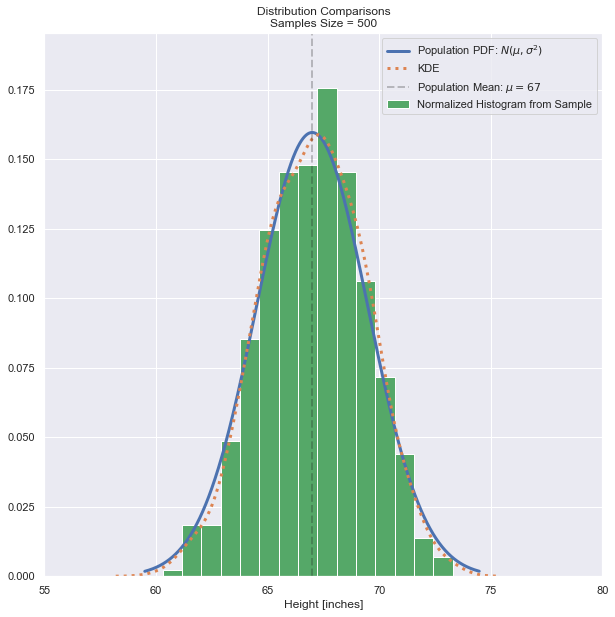

In [3]:
# Histogram and KDE at x_i of the Population
dx = (mu + 3 * sigma - mu + 3 * sigma) / 1000  # split entire distribution space evenly into 1000 parts
x = np.arange(mu - (3 * sigma), mu + (3 * sigma),
              dx)  # create a grid with even space of dx from +- 3sigma between mean
pdf = stats.norm.pdf(x, loc=mu, scale=sigma)

# generate KDE from  sample distribution
kernel = stats.gaussian_kde(heights)  # instantiate KDE method
p_of_low_to_high = kernel.integrate_box_1d(4,
                                           100)  # returns Probability by integrating PDF from 2 inputs (low, high)

# plot overlay PDFs, Histogram, etc...
fig, ax = plt.subplots(figsize=(10, 10))
plt.plot(x, pdf, label=r'Population PDF: $N(\mu, \sigma^2)$', linewidth=3)  # plot Population Distribution
sns.kdeplot(heights, label='KDE', linestyle=':', linewidth=3)  # plot KDE  of sample distribution
(bin_values, _, _) = plt.hist(heights, bins=15, stacked=True, density=True,
                              label='Normalized Histogram from Sample')
# plot normalized histogram with 15 bins of sample distribution, returns the probability from those bins
plt.title(f'Distribution Comparisons\nSamples Size = {n}')
plt.xlabel('Height [inches]')
plt.axvline(x=mu, ymin=0, ymax=1, linestyle='--', alpha=0.25,
            label=r'Population Mean: $\mu = {{{}}}$'.format(mu),
            c='k', linewidth=2)  # vertical line for Mean
plt.ylim((0, max(bin_values) + 0.02))
plt.xlim((55, 80))
plt.legend()
# plt.savefig('PDF_and_KDES.png', bbox_inches='tight')
plt.show()

In [4]:
# Generate sample mean, Standard deviation estimates
x_bar = (1 / n) * sum(heights)
unbiased_sample_variance = (1 / (n - 1)) * sum((heights - x_bar) ** 2)
sample_standard_deviation = np.sqrt(unbiased_sample_variance)

alpha = 0.05
rd = 4  # rounding digit cutoff
tcrit_2sided = stats.t.ppf(1 - (alpha / 2), n - 1)  # t-inverse 2 sided
standard_error = sample_standard_deviation / np.sqrt(n)
value = tcrit_2sided * standard_error  # Defines interval when sigma is not known

real_value = 2 * sigma / np.sqrt(n)

# rounds all outputs to 4 decimals
outputs = np.around(np.array((x_bar, sample_standard_deviation, tcrit_2sided, value, real_value)), decimals=4)

print(f'Sample Mean (x_bar) = {outputs[0]},      Population Mean = {mu}\n'
      f'Sample Standard Deviation (S) = {outputs[1]},      Population Standard Deviation = {sigma}\n'
      f'2-Sided T-critical value: = {outputs[2]}\n'
      f'Estimate Sigma Interval = {outputs[3]}\n'
      f'Actual interval for known Sigma = {outputs[4]}')

Sample Mean (x_bar) = 67.0675,      Population Mean = 67
Sample Standard Deviation (S) = 2.2927,      Population Standard Deviation = 2.5
2-Sided T-critical value: = 1.9647
Estimate Sigma Interval = 0.2015
Actual interval for known Sigma = 0.2236
